# Interpolation

## Übungsblatt

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate


### Aufgabe 1

**1.** Lese die Daten in `Sprinterdaten.csv` ein und stelle diese grafisch dar.

Text(0, 0.5, 'Geschwindigkeit [km/h]')

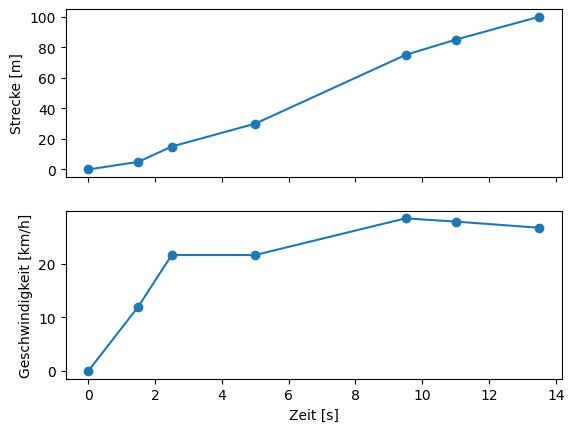

In [56]:
# Aufgabe 1.1
sprinterdaten = np.loadtxt("Sprinterdaten.csv", skiprows=1, delimiter=",")
sprinterdaten

# Unpacking the data into three variables.
s, t, v = sprinterdaten.T

# Creating a figure with two subplots. The first subplot is a plot of the distance over time.
# The second (optional) subplot is a plot of the velocity over time.
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, s, "o-")
ax1.set_ylabel("Strecke [m]")
ax2.plot(t, v, "o-")
ax2.set_xlabel("Zeit [s]")
ax2.set_ylabel("Geschwindigkeit [km/h]")


**2.** Bestimme die Geschwindigkeit zum Zeitpunt $t = 8\,\text{s}$ mithilfe der linearen Interpolation und füge diesen Zeitpunkt in das Diagramm ein.

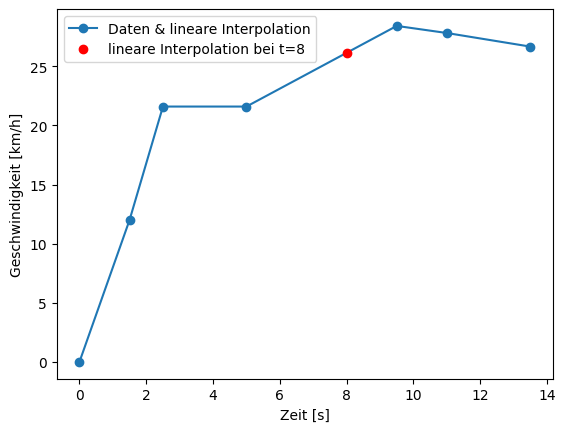

In [38]:
# Von den Lösungen

t0 = 8

# Finding the index of the upper and lower bound of the value of t0.
i_upper = np.searchsorted(t, t0)
i_lower = i_upper - 1

# Calculating the slope of the line between the two points.
delta_v = v[i_upper] - v[i_lower]
delta_t = t[i_upper] - t[i_lower]

# The slope of the line between the two points.
m = delta_v / delta_t

# The linear interpolation formula.
v0 = m * (t0 - t[i_lower]) + v[i_lower]

plt.plot(t, v, "o-", label="Daten & lineare Interpolation")
plt.plot(t0, v0, "ro", label=f"lineare Interpolation bei t={t0}")
plt.xlabel("Zeit [s]")
plt.ylabel("Geschwindigkeit [km/h]")
plt.legend()
plt.show()


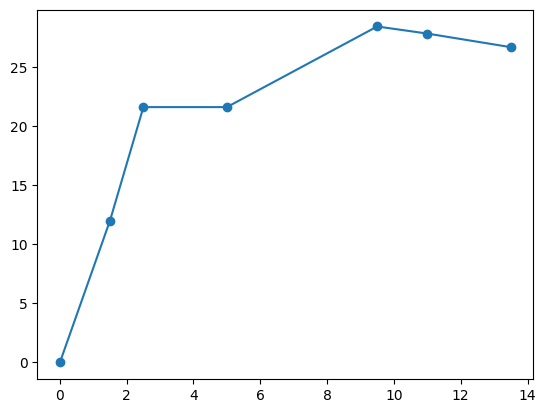

In [37]:
# Aufgabe 1.2
# In der Gruppe gelöst

t0 = 8


def lin_interp(x, x_data, y_data):
    n = len(x_data)
    i_upper = np.searchsorted(x_data, x)
    i_upper = np.where(i_upper < n, i_upper, n - 1)
    i_upper = np.where(i_upper > 1, i_upper, 1)
    i_lower = i_upper - 1
    x_upper = x_data[i_upper]
    y_upper = y_data[i_upper]
    x_lower = x_data[i_lower]
    y_lower = y_data[i_lower]
    return (y_upper - y_lower) / (x_upper - x_lower) * (x - x_lower) + y_lower


lin_interp(t0, s, v)

plt.plot(t, v, "o-", label="Daten und lineare Interpolation")


**3.** Berechne für die Sprinterdaten ein Interpolationspolynom vom Grad 6 oder weniger und stelle dieses auch grafisch dar (zusammen mit den Datenpunkten).

In [49]:
# Aufgabe 1.3: Interpolationspolynom

# Um in Wolfram Alpha einzugeben
print("interpolating polynomial", tuple(zip(t, v)))
print("Lösung von Wolfram Alpha")
print(
    "0 - 2.79903 x + 13.3933 x^2 - 5.21824 x^3 + 0.805375 x^4 - 0.0550288 x^5 + 0.00138547 x^6"
)


interpolating polynomial ((0.0, 0.0), (1.5, 12.0), (2.5, 21.6), (5.0, 21.6), (9.5, 28.42), (11.0, 27.82), (13.5, 26.67))
Lösung von Wolfram Alpha
0 - 2.79903 x + 13.3933 x^2 - 5.21824 x^3 + 0.805375 x^4 - 0.0550288 x^5 + 0.00138547 x^6


$$ p(x) = 0.00138547 x^6 - 0.0550288 x^5 + 0.805375 x^4 - 5.21824 x^3 + 13.3933 x^2 - 2.79903 x + 0 $$

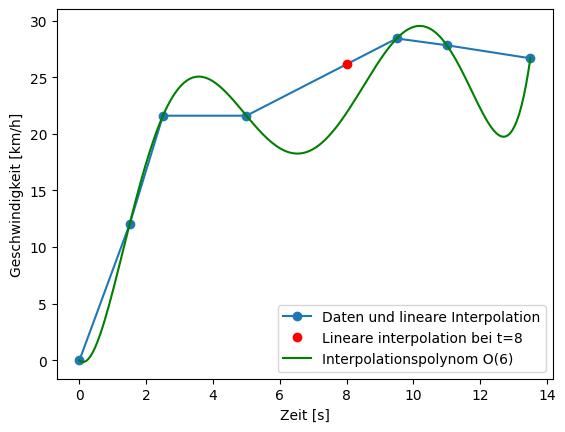

In [63]:
# Aufgabe 1.3 Graphische Darstellung


def p(x):
    return (
        0.00138547 * x**6
        - 0.0550288 * x**5
        + 0.805375 * x**4
        - 5.21824 * x**3
        + 13.3933 * x**2
        - 2.79903 * x
    )


# Creates a vector of 200 equally
# spaced numbers from the minimum to the maximum value of t.
# t (Zeit) was defined before
t_p = np.linspace(t.min(), t.max(), 200)

# Velocity calulated with the number from t(Zeit)
v_p = p(t_p)

# Plotting the data of the linear interpolation.
plt.plot(t, v, "o-", label="Daten und lineare Interpolation")
plt.plot(t0, v0, "ro", label=f"Lineare interpolation bei t={t0}")
plt.plot(t_p, v_p, "g-", label="Interpolationspolynom O(6)")
plt.xlabel("Zeit [s]")
plt.ylabel("Geschwindigkeit [km/h]")
plt.legend()


**np.polyfit** ->``Fitting a polynomial of degree 6 to the data points.``

**np.polyval** -> ``It evaluates the polynomial.``

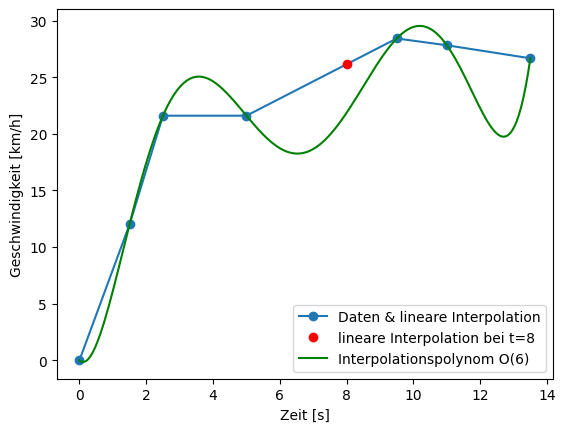

In [65]:
# Fitting a polynomial of degree 6 to the data points.

koeff = np.polyfit(t, v, 6)

t_p = np.linspace(t.min(), t.max(), 200)

# Evaluating the polynomial with the coefficients `koeff` at the points `t_p`.
v_p = np.polyval(koeff, t_p)

plt.plot(t, v, "o-", label="Daten & lineare Interpolation")
plt.plot(t0, v0, "ro", label=f"lineare Interpolation bei t={t0}")
plt.plot(t_p, v_p, "g-", label="Interpolationspolynom O(6)")
plt.xlabel("Zeit [s]")
plt.ylabel("Geschwindigkeit [km/h]")
plt.legend()
plt.show()


**4.** Stelle die Interpolation der SciPy funktion [`scipy.interpolate.interp1d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d) grafisch dar.


Snytax :    
class scipy.interpolate.interp1d(x, y, kind='linear', axis=-1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)


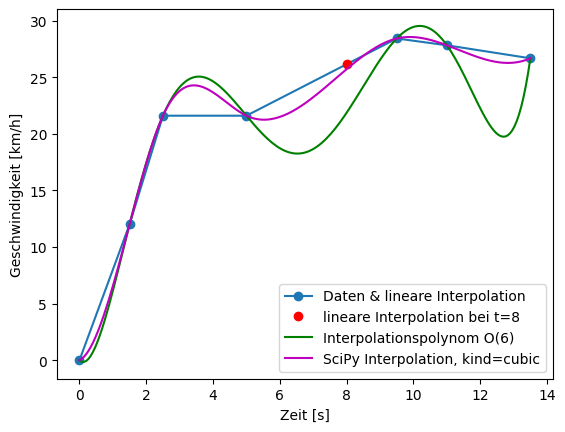

In [68]:
# Aufgabe 1.4
from scipy import interpolate

kind = "cubic"
# 'linear', 'nearest', 'nearest-up', 'zero', 'slinear',
# 'quadratic', 'cubic', 'previous', 'next'

# Creating a function that can be used to interpolate the data.
predict = interpolate.interp1d(t, v, kind)
t2 = np.linspace(t.min(), t.max(), 200)
v2 = predict(t2)

plt.plot(t, v, "o-", label="Daten & lineare Interpolation")
plt.plot(t0, v0, "ro", label=f"lineare Interpolation bei t={t0}")
plt.plot(t_p, v_p, "g-", label="Interpolationspolynom O(6)")
plt.plot(t2, v2, "m-", label=f"SciPy Interpolation, kind={kind}")
plt.xlabel("Zeit [s]")
plt.ylabel("Geschwindigkeit [km/h]")
plt.legend()
plt.show()


### Aufgabe 2

**1.** Lese die Daten in `Alter_Groesse.csv` ein und stelle diese grafisch dar.

In [9]:
# Aufgabe 2.1
#loads the data from the csv file
# skips the first row 
# uses the semicolon as a delimiter.

alter_grösse = np.loadtxt("Alter_Groesse.csv", skiprows=1, delimiter=";")
alter_grösse

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


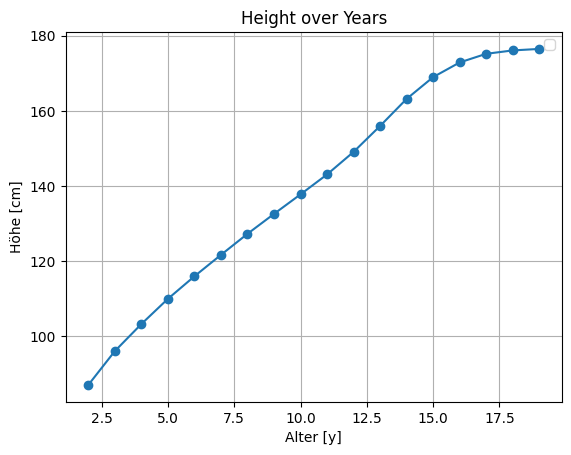

In [94]:
# Graphische Darstellung 
# y = years 
# h = height 

# Unpacking the data and save in a Array
y, h = alter_grösse.T

fig, (ax1) = plt.subplots(1, 1, sharex=False)
ax1.plot(y, h, "o-")
ax1.set_ylabel("Höhe [cm]")
ax1.set_xlabel("Alter [y]")
plt.title("Height over Years")
plt.legend()
plt.grid()



**2.** Bestimme die Grösse zum Zeitpunkt $a = 11$ mithilfe der linearen Interpolation und füge diesen Zeitpunkt in das Diagramm ein.

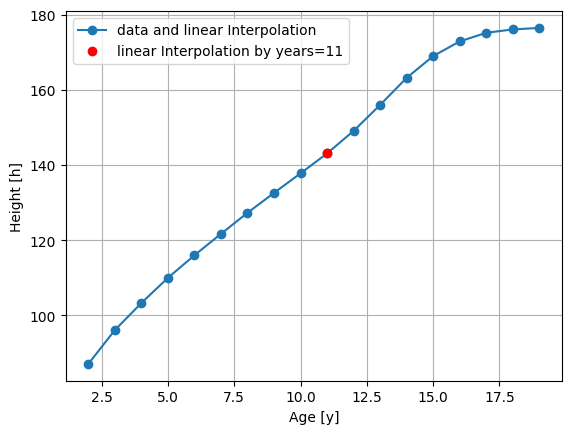

In [96]:
# Aufgabe 2.2
a = 11 

# Finding the index of the upper and lower bound of the value of a.
i_upper = np.searchsorted(y, a)
i_lower = i_upper - 1

# Calculating the slope of the line between the two points.
delta_y = y[i_upper] - y[i_lower] #x Axis 
delta_h = h[i_upper] - h[i_lower] #y Axis

# The slope of the line between the two points.
# Formula (delta(y)/delta(x))
m = delta_h / delta_y

# The linear interpolation formula.
h0 = m * (a - y[i_lower]) + h[i_lower]

plt.plot(y, h, "o-", label="data and linear Interpolation")
plt.plot(a, h0, "ro", label=f"linear Interpolation by years={a}")
plt.xlabel("Age [y]")
plt.ylabel("Height [h]")
plt.legend()
plt.grid()

**3.** Berechne mithilfe einer Koeffizientenmatrix ein Polynom maximal 6. Grades für die Sprinterdaten und stelle dieses auch grafisch dar (zusammen mit den Datenpunkten).

- Verwende hierfür die ersten 6 Datenpunkte


In [11]:
# 3. Interpolation mit Polynom


In [12]:
# Aufgabe 2.3


**Optional: Was ist das Problem einer Interpolation ausserhalb ihres Wertebereichs?**
